In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display Pandas Dataframes Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

PHYSICAL_THREADS = 8

In [2]:
serial_data = pd.read_csv("datasets/data-Serial.csv").to_numpy()
spmd_data = pd.read_csv("datasets/data-SPMD.csv").to_numpy()
sstatic_data = pd.read_csv("datasets/data-SStatic.csv").to_numpy()
sdynamic_data = pd.read_csv("datasets/data-SDynamic.csv").to_numpy()
sguided_data = pd.read_csv("datasets/data-SGuided.csv").to_numpy()
sauto_data = pd.read_csv("datasets/data-SAuto.csv").to_numpy()

threads_array = np.arange(start=1,stop=PHYSICAL_THREADS+1) # Returns numpy array from 1 (Inclusive) to 9 (Exclusive)

algorithm_data = pd.DataFrame(columns=
    ['ThreadQty', 
     'Code 1 (SPMD)', 
     'Code 2 (Static)',
     'Code 3 (Dynamic)',
     'Code 4 (Guided)',
     'Code 5 (Auto)'
    ])

columns = pd.MultiIndex.from_product([['Speedup', 'Efficiency', 'Parallelizability']], names=[''])
codes = ['SPMD', 'Static', 'Dynamic', 'Guided', 'Auto']
rows = pd.MultiIndex.from_tuples([(thread, code) for thread in threads_array for code in codes], names=['ThreadQty', ''])
algorithm_metrics = pd.DataFrame(index=rows, columns=columns)

#### Secuential Algorithm Data

In [3]:
secuential_data = pd.DataFrame(columns=['Code 0 (Serial)'])
secuential_data.loc['1'] = np.mean(serial_data)
print("\033[1mSecuential Algorithm Execution Time:\033[0m\n \tNPOINTS: 1000\tMAXITER: 1000\n \tTimes Executed per Thread: 5")
secuential_data

Secuential Algorithm Execution Time:
 	NPOINTS: 1000	MAXITER: 1000
 	Times Executed per Thread: 5


,Code 0 (Serial)
1,5.748721


#### Parallel Algorithms Data

In [4]:
for index in range(len(spmd_data)):
    algorithm_data.loc[f'{index+1}'] = [
        f'{threads_array[index]}', 
        np.mean(spmd_data[index]), 
        np.mean(sstatic_data[index]),
        np.mean(sdynamic_data[index]),
        np.mean(sguided_data[index]),
        np.mean(sauto_data[index])
    ]

algorithm_data.set_index('ThreadQty', inplace=True)
print("\033[1mParallel Algorithm Analysis:\033[0m\n \tNPOINTS: 1000\tMAXITER: 1000\n \tTimes Executed per Thread: 5")
algorithm_data

Parallel Algorithm Analysis:
 	NPOINTS: 1000	MAXITER: 1000
 	Times Executed per Thread: 5


,Code 1 (SPMD),Code 2 (Static),Code 3 (Dynamic),Code 4 (Guided),Code 5 (Auto)
ThreadQty,,,,,
1,3.412109,3.419052,3.420158,3.407987,3.423400
2,2.229384,1.656697,1.453982,1.659785,1.660457
3,1.830348,0.890479,0.893719,0.892333,0.898308
4,1.702878,1.438078,1.442966,1.443952,1.445420
5,1.535785,0.209494,0.209617,0.209180,0.210320
6,1.525678,0.209596,0.209844,0.209920,0.209440
7,1.522983,0.208865,0.209831,0.210442,0.210163
8,1.525632,0.208865,0.210097,0.209910,0.210251


#### Algorithm Metrics

In [5]:
for index in range(len(threads_array)):
    for j in range(len(codes)):
        speedup = secuential_data.iat[0, 0] / np.round(algorithm_data.iat[index, j], 6)
        efficiency = np.round((speedup / algorithm_data.iat[index, j]) * 100, 2)
        parallelizability = np.round(algorithm_data.iat[0, j] / algorithm_data.iat[index, j],3)

        algorithm_metrics.at[(threads_array[index], codes[j]), ('Speedup')] = speedup
        algorithm_metrics.at[(threads_array[index], codes[j]), ('Efficiency')] = f'{efficiency}%'
        algorithm_metrics.at[(threads_array[index], codes[j]), ('Parallelizability')] = parallelizability
        
print("\033[1mAlgorithms Metrics\033[0m")
algorithm_metrics

Algorithms Metrics


Speedup Efficiency Parallelizability
ThreadQty                                                
1         SPMD        1.6848     49.38%               1.0
          Static    1.681379     49.18%               1.0
          Dynamic   1.680835     49.14%               1.0
          Guided    1.686838      49.5%               1.0
          Auto      1.679243     49.05%               1.0
2         SPMD      2.578614    115.66%             1.531
          Static     3.46999    209.45%             2.064
          Dynamic   3.953777    271.93%             2.352
          Guided    3.463534    208.67%             2.053
          Auto      3.462132     208.5%             2.062
3         SPMD       3.14078    171.59%             1.864
          Static    6.455763    724.98%              3.84
          Dynamic   6.432359    719.73%             3.827
          Guided     6.44235    721.97%             3.819
          Auto      6.399499    712.39%             3.811
4         SPMD      3.375886    198.25%             2.004
          Static    3.997503    277.98%             2.378
          Dynamic   3.983962     276.1%              2.37
          Guided    3.981241    275.72%              2.36
          Auto      3.977198    275.16%             2.368
5         SPMD      3.743181    243.73%             2.222
          Static   27.440983  13098.71%            16.321
          Dynamic  27.424881  13083.35%            16.316
          Guided   27.482174  13138.03%            16.292
          Auto     27.333212  12996.04%            16.277
6         SPMD      3.767978    246.97%             2.236
          Static   27.427628  13085.94%            16.313
          Dynamic  27.395214  13055.01%            16.299
          Guided   27.385295  13045.61%            16.235
          Auto     27.448058  13105.48%            16.346
7         SPMD      3.774646    247.85%              2.24
          Static   27.523621   13177.7%             16.37
          Dynamic  27.396911  13056.68%              16.3
          Guided   27.317366  12980.96%            16.194
          Auto     27.353631  13015.41%            16.289
8         SPMD      3.768092    246.99%             2.237
          Static   27.523621  13177.71%             16.37
          Dynamic  27.362224  13023.63%            16.279
          Guided     27.3866   13046.8%            16.235
          Auto     27.342182  13004.52%            16.282

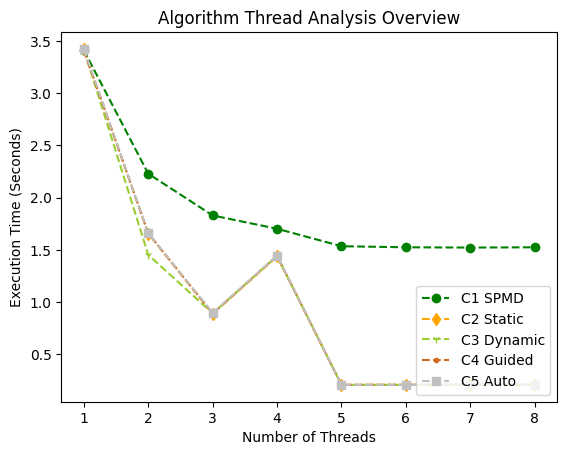

In [6]:
plt.title("Algorithm Thread Analysis Overview")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, algorithm_data.get('Code 2 (Static)'), 'd--', label="C2 Static", color='orange')
plt.plot(threads_array, algorithm_data.get('Code 3 (Dynamic)'), '1--', label="C3 Dynamic", color='yellowgreen')
plt.plot(threads_array, algorithm_data.get('Code 4 (Guided)'), '.--', label="C4 Guided", color='chocolate')
plt.plot(threads_array, algorithm_data.get('Code 5 (Auto)'), 's--', label="C5 Auto", color='silver')
plt.legend(loc="lower right")
plt.xticks(threads_array)
plt.show()